In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "customer-personality-analysis"

**About the dataset**

**Context**

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Content**
**Attributes**

**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumWebPurchases: Number of purchases made through the company’s web site
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s web site in the last month.


# Market Segmentation

In this project, i will be performing unsupervised learning on the data. The goal is to find patterns in the data without trying to make predictions.

# Importing Data

In [2]:
customers <- read.delim("../input/customer-personality-analysis/marketing_campaign.csv", stringsAsFactors = FALSE)
head(customers, n = 6)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
3,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
4,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
6,7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


# EDA

In [3]:
glimpse(customers)


Rows: 2,240
Columns: 29
$ ID                  <int> 5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 485…
$ Year_Birth          <int> 1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 19…
$ Education           <chr> "Graduation", "Graduation", "Graduation", "Graduat…
$ Marital_Status      <chr> "Single", "Single", "Together", "Together", "Marri…
$ Income              <int> 58138, 46344, 71613, 26646, 58293, 62513, 55635, 3…
$ Kidhome             <int> 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,…
$ Teenhome            <int> 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,…
$ Dt_Customer         <chr> "04-09-2012", "08-03-2014", "21-08-2013", "10-02-2…
$ Recency             <int> 58, 38, 26, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82…
$ MntWines            <int> 635, 11, 426, 11, 173, 520, 235, 76, 14, 28, 5, 6,…
$ MntFruits           <int> 88, 1, 49, 4, 43, 42, 65, 10, 0, 0, 5, 16, 61, 2, …
$ MntMeatProducts     <int> 546, 6, 127, 20, 118, 98, 164, 56, 24, 6, 6, 11, 4…
$ MntFishProduct

In [4]:
dim(customers)

[1] 2240   29

In [5]:
#summary statistics
summary(customers)

       ID          Year_Birth    Education         Marital_Status    
 Min.   :    0   Min.   :1893   Length:2240        Length:2240       
 1st Qu.: 2828   1st Qu.:1959   Class :character   Class :character  
 Median : 5458   Median :1970   Mode  :character   Mode  :character  
 Mean   : 5592   Mean   :1969                                        
 3rd Qu.: 8428   3rd Qu.:1977                                        
 Max.   :11191   Max.   :1996                                        
                                                                     
     Income          Kidhome          Teenhome      Dt_Customer       
 Min.   :  1730   Min.   :0.0000   Min.   :0.0000   Length:2240       
 1st Qu.: 35303   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median : 51382   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   : 52247   Mean   :0.4442   Mean   :0.5062                     
 3rd Qu.: 68522   3rd Qu.:1.0000   3rd Qu.:1.0000                     
 Max.   :66666

Warning message:
“Removed 24 rows containing non-finite values (stat_boxplot).”


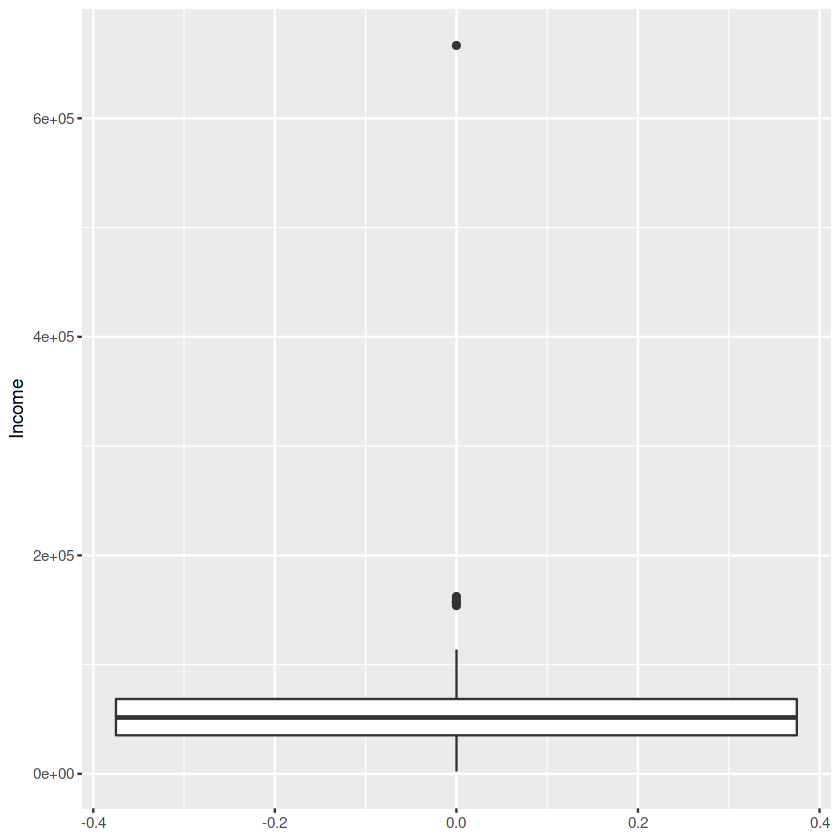

In [6]:
ggplot(customers, aes(y = Income)) + geom_boxplot() 

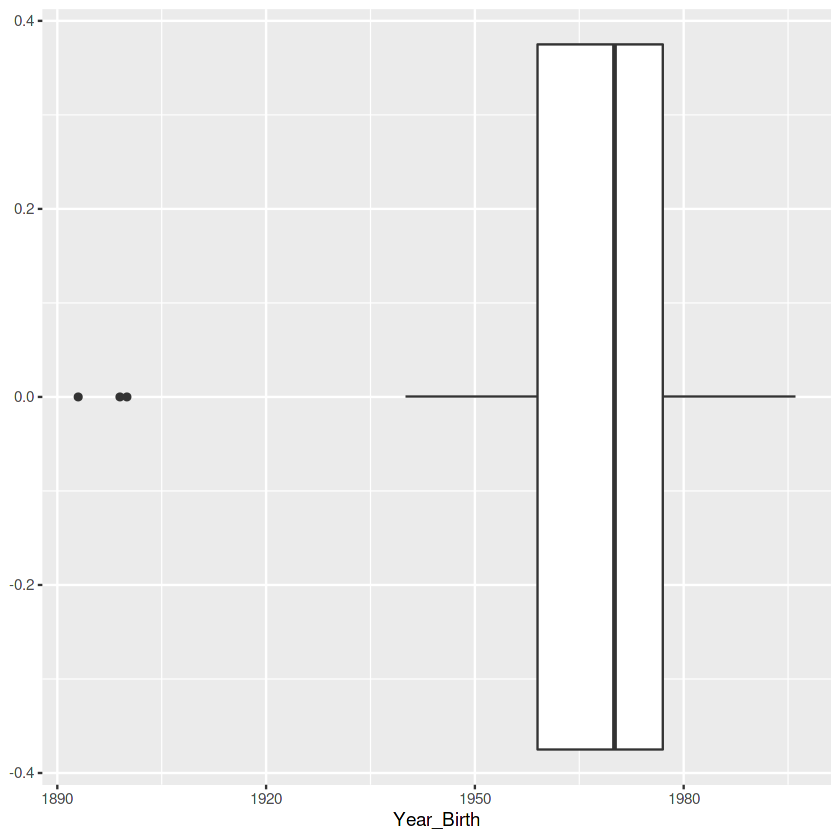

In [7]:
# Boxplot of the Year of birth variable
ggplot(customers, aes(Year_Birth)) + geom_boxplot()

In [8]:
#counting the total number of missing values in the data
library(naniar)
n_miss(customers)

[1] 24

In [9]:
# Summarizing missingness in each variable 
miss_var_summary(customers)

variable,n_miss,pct_miss
<chr>,<int>,<dbl>
Income,24,1.071429
ID,0,0.000000
Year_Birth,0,0.000000
Education,0,0.000000
Marital_Status,0,0.000000
Kidhome,0,0.000000
Teenhome,0,0.000000
Dt_Customer,0,0.000000
Recency,0,0.000000


**From the above output, we can note the following:**
* Dt_Customer that indicates a cutomer joined the database is not parsed as Date object.
* There are missing values in the income variable.
* There are some categorical features, so we will need to encode into numeric form as we proceed.
* We also noted from looking at the summary statistics, the minimum year of birth 1893. This became clear when we plotted a boxplot.
* Also, we can see that the maximum value of the income variable is larger than the 3rd quantile.
* The features Z_CostContact and Z_Revenue show no variation.

We will make adjustments as we proceed.

# Pre-Processing Data

In [10]:
# Going to drop the rows that have missing income values.
customers <- na.omit(customers)
dim(customers)

[1] 2216   29

In [11]:
#Parsing the Dt_Customer as Date object
#But first i need to make sure that the date is according to ISO 8601 standards before converting it to a Date object thats where the function dmy() from the lubridate package comes in.
library(lubridate)
customers <- customers %>% mutate(Dt_Customer = as.Date(dmy(Dt_Customer)))
str(customers$Dt_Customer)
# Dates of the oldest and newest recorded customer
paste0("The oldest enrolment date of a customer dates to: ",  min(customers$Dt_Customer))
paste0("The newest enrolment date of a customer dates to: ", max(customers$Dt_Customer))



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




 Date[1:2216], format: "2012-09-04" "2014-03-08" "2013-08-21" "2014-02-10" "2014-01-19" ...


[1] "The oldest enrolment date of a customer dates to: 2012-07-30"

[1] "The newest enrolment date of a customer dates to: 2014-06-29"

In [12]:

#creating a new variable Age from Year of Birth 
customers <- customers %>% mutate(Age = 2021 - Year_Birth)
customers %>% select(Age) %>% arrange(desc(Age)) %>% top_n(3)
# Max Age is > 100 
#Dropping outliers by setting a cap on Income and Age
customers <- customers %>% filter(Income < 600000 & Age < 90)
dim(customers)

#Collapsing marital Status into two categories: Single & Taken
unique(customers$Marital_Status)
customers <- customers %>% mutate(Marital_Status = replace(Marital_Status, Marital_Status == "Divorced" | Marital_Status == "Widow" | Marital_Status == "Alone" | Marital_Status == "Absurd" | Marital_Status == "YOLO", "Single"))
customers <- customers %>% mutate(Marital_Status = replace(Marital_Status, Marital_Status == "Together" | Marital_Status == "Married", "Taken"))

#Collapsing the Education into two Categories: graduate and non-graduate
unique(customers$Education)
customers <- customers %>% mutate(Education = replace(Education, Education == "Graduation"| Education == "PhD" | Education == "Master", "graduate"))
customers <- customers %>% mutate(Education = replace(Education, Education == "Basic"| Education == "2n Cycle", "non-graduate"))

#Converting them to factors
customers <- customers %>% mutate(Marital_Status = as.factor(Marital_Status), Education = as.factor(Education))

#Renaming the Mnt_ features
customers <- customers %>% rename(wines = MntWines, fruits = MntFruits, meat = MntMeatProducts, fish = MntFishProducts, sweet = MntSweetProducts, gold = MntGoldProds )

#Creating a new variable:Total_spent
customers <- customers %>% mutate(Total_spent = wines + fruits + meat + fish + sweet + gold)

#Dropping some redundant features
customers <- customers %>% select(- ID, - Year_Birth, - Dt_Customer, - Z_CostContact, - Z_Revenue)
str(customers)
head(customers, n = 5)


Selecting by Age



Age
<dbl>
128
122
121


[1] 2212   30

[1] "Single"   "Together" "Married"  "Divorced" "Widow"    "Alone"    "Absurd"  
[8] "YOLO"

[1] "Graduation" "PhD"        "Master"     "Basic"      "2n Cycle"

'data.frame':	2212 obs. of  26 variables:
 $ Education          : Factor w/ 2 levels "graduate","non-graduate": 1 1 1 1 1 1 1 1 1 1 ...
 $ Marital_Status     : Factor w/ 2 levels "Single","Taken": 1 1 2 2 2 2 1 2 2 2 ...
 $ Income             : int  58138 46344 71613 26646 58293 62513 55635 33454 30351 5648 ...
 $ Kidhome            : int  0 1 0 1 1 0 0 1 1 1 ...
 $ Teenhome           : int  0 1 0 0 0 1 1 0 0 1 ...
 $ Recency            : int  58 38 26 26 94 16 34 32 19 68 ...
 $ wines              : int  635 11 426 11 173 520 235 76 14 28 ...
 $ fruits             : int  88 1 49 4 43 42 65 10 0 0 ...
 $ meat               : int  546 6 127 20 118 98 164 56 24 6 ...
 $ fish               : int  172 2 111 10 46 0 50 3 3 1 ...
 $ sweet              : int  88 1 21 3 27 42 49 1 3 1 ...
 $ gold               : int  88 6 42 5 15 14 27 23 2 13 ...
 $ NumDealsPurchases  : int  3 2 1 2 5 2 4 2 1 1 ...
 $ NumWebPurchases    : int  8 1 8 2 5 6 7 4 3 1 ...
 $ NumCatalogPurchases: int  10 1 2 0 3 4 

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,wines,fruits,meat,fish,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_spent
,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,graduate,Single,58138,0,0,58,635,88,546,172,⋯,7,0,0,0,0,0,0,1,64,1617
2,graduate,Single,46344,1,1,38,11,1,6,2,⋯,5,0,0,0,0,0,0,0,67,27
3,graduate,Taken,71613,0,0,26,426,49,127,111,⋯,4,0,0,0,0,0,0,0,56,776
4,graduate,Taken,26646,1,0,26,11,4,20,10,⋯,6,0,0,0,0,0,0,0,37,53
5,graduate,Taken,58293,1,0,94,173,43,118,46,⋯,5,0,0,0,0,0,0,0,40,422


**Correlation  reveals feature resemblance and it will help us infer how they are related to each other based on their features' values**

corrplot 0.88 loaded



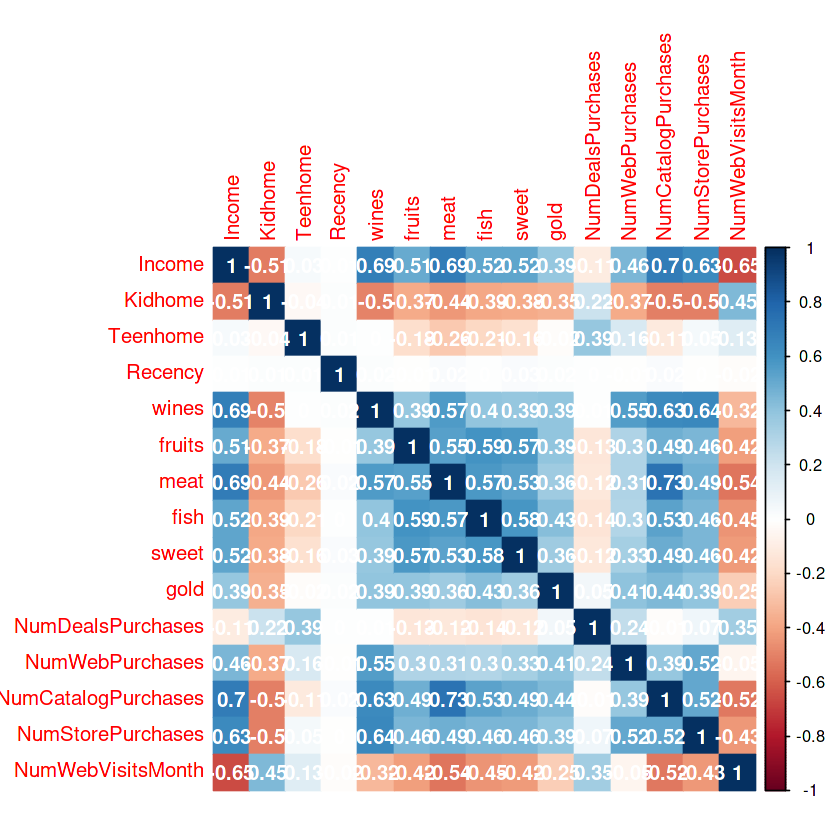

In [13]:
library(corrplot)

#Getting correlation matrix 
cust_cor <- cor(customers[,3:17])
corrplot(cust_cor, method = "color", addCoef.col = "white")

**Seeing this shows how difficult it can be to trace patterns based solely on the correlation structure. 
Also handling correlation efficiently is one of the key reasons for conducting dimensionality reduction.**

**making a copy of the data**

In [14]:
customers_copy <- customers

**Encoding the categorical features & Standardizing**

In [15]:
# Encoding the categorical features to numeric
customers_copy <- customers_copy %>% mutate(Education = case_when(Education == "graduate" ~ 1,
                                                        Education == "non-graduate" ~ 0))
customers_copy <- customers_copy %>% mutate(Marital_Status = case_when(Marital_Status == "Taken" ~ 1,
                                                             Marital_Status == "Single" ~ 0))

str(customers_copy$Education)
str(customers_copy$Marital_Status)

 num [1:2212] 1 1 1 1 1 1 1 1 1 1 ...
 num [1:2212] 0 0 1 1 1 1 0 1 1 1 ...


**Standardization**

In [16]:
library(caret)
#preprocessing the data
customers_copy_pre <- preProcess(customers_copy[,c(3, 6:17, 25:26)], method = c("center", "scale"))

#normalizing 
customers_copy <- predict(customers_copy_pre, customers_copy[, c(3, 6:17, 25:26)])
summary(customers_copy)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




     Income           Recency               wines             fruits       
 Min.   :-2.3333   Min.   :-1.6936473   Min.   :-0.9050   Min.   :-0.6625  
 1st Qu.:-0.7769   1st Qu.:-0.8644347   1st Qu.:-0.8339   1st Qu.:-0.6122  
 Median :-0.0273   Median :-0.0006716   Median :-0.3848   Median :-0.4612  
 Mean   : 0.0000   Mean   : 0.0000000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.7678   3rd Qu.: 0.8630914   3rd Qu.: 0.5921   3rd Qu.: 0.1678  
 Max.   : 5.1302   Max.   : 1.7268545   Max.   : 3.5210   Max.   : 4.3446  
      meat              fish             sweet              gold        
 Min.   :-0.7448   Min.   :-0.6874   Min.   :-0.6582   Min.   :-0.8495  
 1st Qu.:-0.6735   1st Qu.:-0.6326   1st Qu.:-0.6339   1st Qu.:-0.6755  
 Median :-0.4416   Median :-0.4683   Median :-0.4635   Median :-0.3757  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.2908   3rd Qu.: 0.2255   3rd Qu.: 0.1449   3rd Qu.: 0.2335  
 Max.   : 6.9473   Max.   : 4.

**The output shows that all the numerical variables have been standardized with mean value of ZERO**

# Dimensionality Reduction: PCA

Dimensionality reduction has two main goals: to find structure within features and aid in visualization. One particular and popular method of dimensionality reduction is the principal component analysis(PCA).

PCA has 3 goals 
1. PCA will find a linear combination of the original features.
2. Maintain most variance in the data.
3. Principal component are uncorrelated(i.e orthogonal to each other)


  

**PCA with FactoMineR**

We will use the FactoMineR package, which provides the most well-rounded collection of extraction/estimation methods for PCA.

In [17]:
library(FactoMineR)

#Running a PCA.
customers_copy_pca <- PCA(customers_copy, graph = FALSE)

#Exploring PCA()

# Getting the summary of the pca
summary(customers_copy_pca)

#Getting the variance of the first 7 new dimensions
customers_copy_pca$eig[,2][1:7]

#Getting the cummulative variance
customers_copy_pca$eig[,3][1:7]

#Getting the most correlated variables
dimdesc(customers_copy_pca, axes = 1:2)


#Tracing variable contributions in customers_pca
customers_copy_pca$var$contrib





Call:
PCA(X = customers_copy, graph = FALSE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               6.744   1.590   1.078   1.000   0.823   0.665   0.636
% of var.             44.959  10.601   7.186   6.668   5.486   4.432   4.243
Cumulative % of var.  44.959  55.560  62.746  69.414  74.900  79.332  83.575
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.554   0.436   0.399   0.372   0.265   0.254   0.184
% of var.              3.694   2.909   2.658   2.482   1.764   1.693   1.225
Cumulative % of var.  87.269  90.178  92.835  95.317  97.082  98.775 100.000
                      Dim.15
Variance               0.000
% of var.              0.000
Cumulative % of var. 100.000

Individuals (the 10 first)
                        Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2  
1                   |  5.330 |  4.053  0.110  0.578 |  0.653  0.012  0.015 |
2                   |  2.

comp 1    comp 2    comp 3    comp 4    comp 5    comp 6    comp 7 
44.959042 10.600977  7.185787  6.668300  5.485850  4.431584  4.242983

comp 1   comp 2   comp 3   comp 4   comp 5   comp 6   comp 7 
44.95904 55.56002 62.74581 69.41411 74.89996 79.33154 83.57452

,correlation,p.value
Total_spent,0.95335342,0.000000e+00
Income,0.85929762,0.000000e+00
NumCatalogPurchases,0.82167721,0.000000e+00
meat,0.82116415,0.000000e+00
wines,0.78358369,0.000000e+00
NumStorePurchases,0.74640021,0.000000e+00
fish,0.72350370,0.000000e+00
fruits,0.69901477,0.000000e+00
sweet,0.69879300,0.000000e+00
gold,0.57659775,3.252916e-196


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Income,10.949112150,0.047427608,4.706888079,0.293568335,2.309138e+00
Recency,0.005759426,0.003472919,2.973700015,96.369943346,4.130839e-04
wines,9.104633401,5.176872326,1.723392851,0.072113497,1.275371e+01
fruits,7.245433709,2.489426855,6.540151479,0.020204043,1.025831e+01
meat,9.998886834,1.812481510,0.005433087,0.041583066,5.119238e+00
fish,7.761992247,2.710783607,4.605369643,0.045946492,1.090832e+01
sweet,7.240837051,1.992677142,4.829413242,0.340168147,8.501480e+00
gold,4.929893857,2.520537236,6.517965707,0.553412776,1.223693e+01
NumDealsPurchases,0.127298459,37.551785838,2.957829533,0.350804789,4.249777e-02
NumWebPurchases,4.657167260,22.562958195,0.878256488,0.017291331,2.019093e-01


**Visualizing PCA**

In [18]:
library(factoextra)


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



**Plotting contributions of variables**

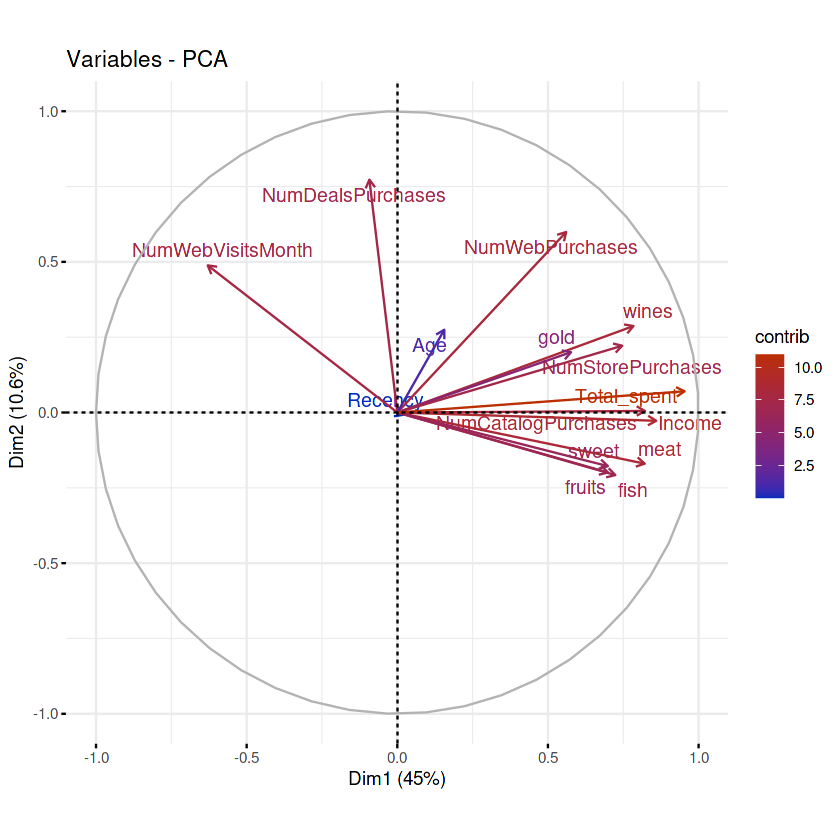

In [19]:
#Creating a factor map for the variable contributions
fviz_pca_var(customers_copy_pca, col.var = "contrib", gradient.cols = c("#002bbb", "#bb2e00"), repel = TRUE)

**Plotting Top 5 in the contributions**

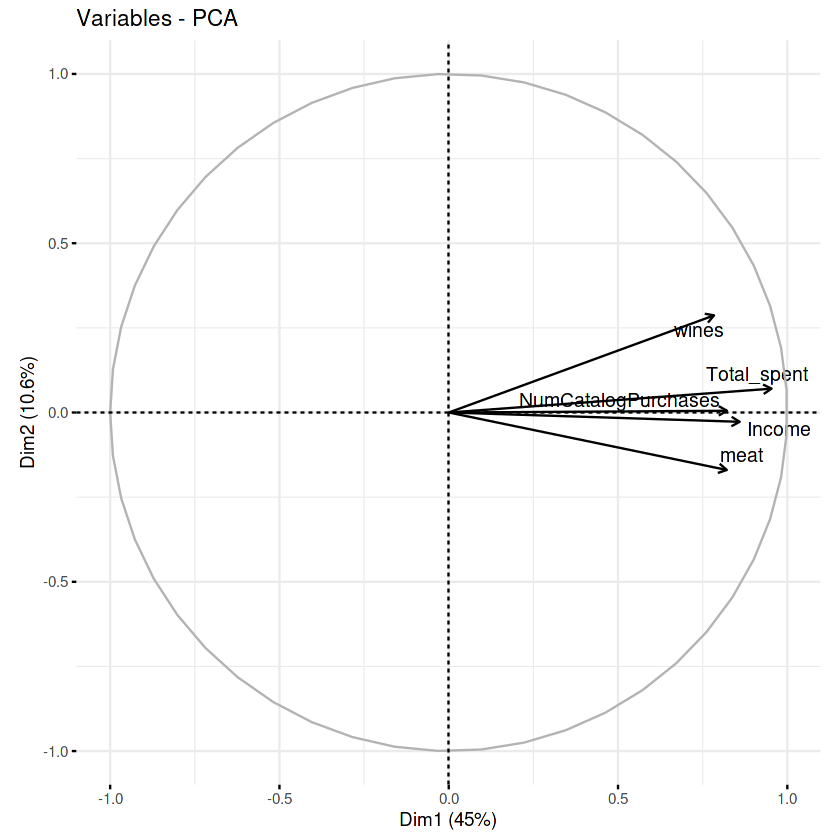

In [20]:
#Creating a factor map for the top 5 variables with the highest contributions.
fviz_pca_var(customers_copy_pca, select.var = list(contrib = 5), repel = TRUE)

**Barplotting the contributions of variables**

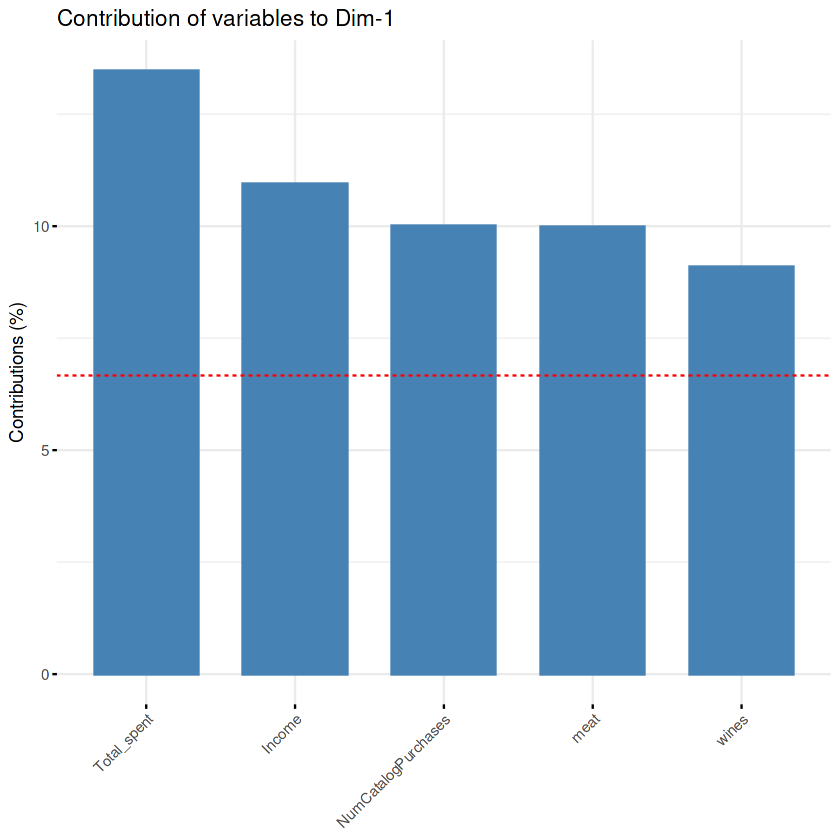

In [21]:
fviz_contrib(customers_copy_pca, choice = "var", axes = 1, top = 5)

**The red line corresponds to the expected percentage if the distributions were uniform**

**Biplots**

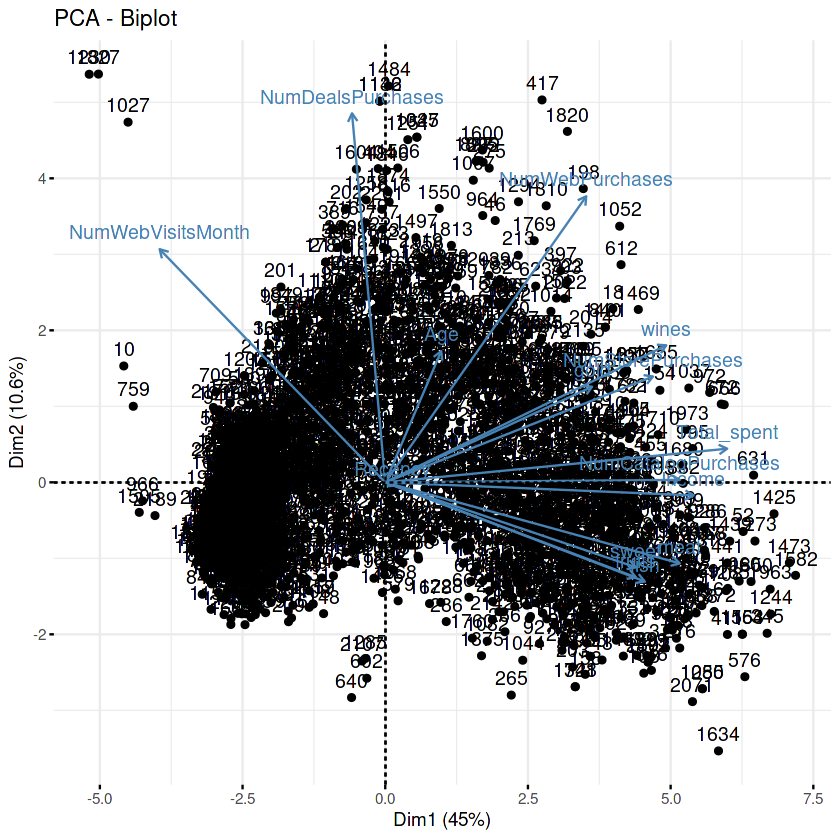

In [22]:
fviz_pca_biplot(customers_copy_pca)

# k-means clustering

The k-means algorithm is one common approach to clustering. We will implement k-means clustering, visualize and interpret the results. But first we will apply different methods that addresses the challenge of estimating k empirically from the data. These methods include:

1. The elbow method - relies on calculating the total within cluster sum of squares across every cluster
2. Silhouette analysis. 


**The elbow method**

,k,tot_withinss
,<int>,<dbl>
1,1,33165.00
2,2,21304.40
3,3,18523.80
4,4,17692.17
5,5,16713.36
6,6,16022.44


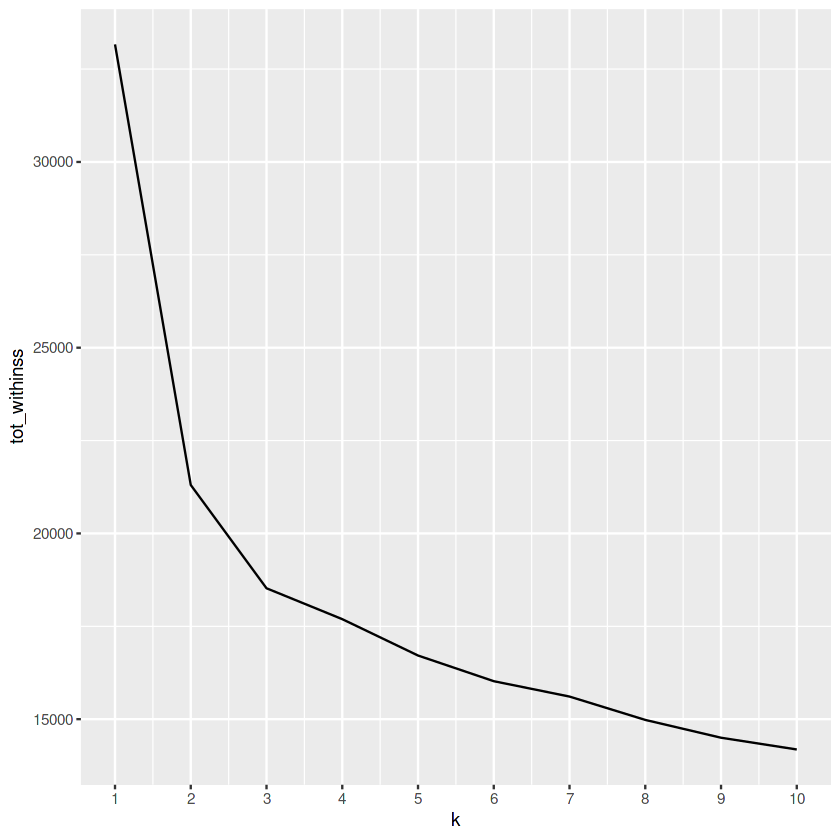

In [23]:
library(purrr)
tot_withinss <- map_dbl(1:10, function(k){
  model <- kmeans(x = customers_copy, centers = k)
  model$tot.withinss
})

elbow_df <- data.frame(
       k = 1:10,
       tot_withinss = tot_withinss)
head(elbow_df)
 #plotting the elbow plot
ggplot(elbow_df, aes(k, tot_withinss)) + geom_line() + scale_x_continuous(breaks = 1:10)

Looking at the elbow plot, we can see a sharp decline from one k to another followed by a more gradual decrease in shape. From the plot above the "good" value of k is 2.

**Silhouette analysis**

This method provides a different lens through which you can understand the results of your cluster analysis. It can be used to determine how well each of your observations fit into its corresponding cluster and can be leveraged as an additional method for estimating the value of k





**Average Silhouette width**

The greater the average width the better the individual observations match to their clusters.

,k,sil_width
,<int>,<dbl>
1,2,0.3401880
2,3,0.2474708
3,4,0.1246912
4,5,0.1141648
5,6,0.1121651
6,7,0.1101546


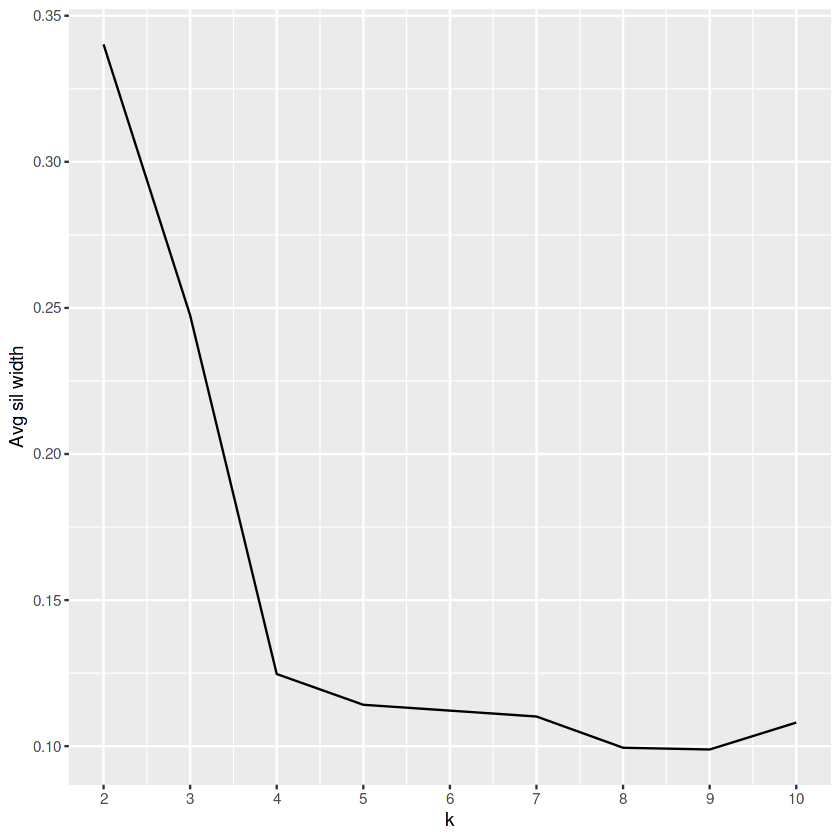

In [24]:

library(cluster)
sil_width <- map_dbl(2:10, function(k){
    model <- pam(customers_copy, k = k)
    model$silinfo$avg.width
})
sil_df <- data.frame(
    k = 2:10,
    sil_width = sil_width
)
 head(sil_df)
ggplot(sil_df, aes(k, sil_width)) + geom_line() + scale_x_continuous(breaks = 2:10) + labs(y = "Avg sil width")

The maximum average silhouette width is for a k of 2, which has a value greater than zero and close to 1 suggesting that the observations are well matched to their assigned cluster.

**Both methods recommended  a k of two**


In [25]:
set.seed(42)

#Building a k-means model with a k of 2
customers_md <- kmeans(customers_copy, center = 2)

#Extracting the vector of cluster assignment from the model
clust_customers <- customers_md$cluster

#Building the segment_customers dataframe
segment_customers <- mutate(customers_copy, cluster = clust_customers)

#Calculating the mean for each category
count(segment_customers, cluster)


#Adding the cluster variable to the original dataframe
customers <- customers %>% mutate(cluster = segment_customers$cluster)
head(customers, n = 4)
#confirming
count(customers, cluster)


cluster,n
<int>,<int>
1,1324
2,888


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,wines,fruits,meat,fish,⋯,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_spent,cluster
,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,graduate,Single,58138,0,0,58,635,88,546,172,⋯,0,0,0,0,0,0,1,64,1617,2
2,graduate,Single,46344,1,1,38,11,1,6,2,⋯,0,0,0,0,0,0,0,67,27,1
3,graduate,Taken,71613,0,0,26,426,49,127,111,⋯,0,0,0,0,0,0,0,56,776,2
4,graduate,Taken,26646,1,0,26,11,4,20,10,⋯,0,0,0,0,0,0,0,37,53,1


cluster,n
<int>,<int>
1,1324
2,888


**Visualizing the top 5 features in the contribution**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



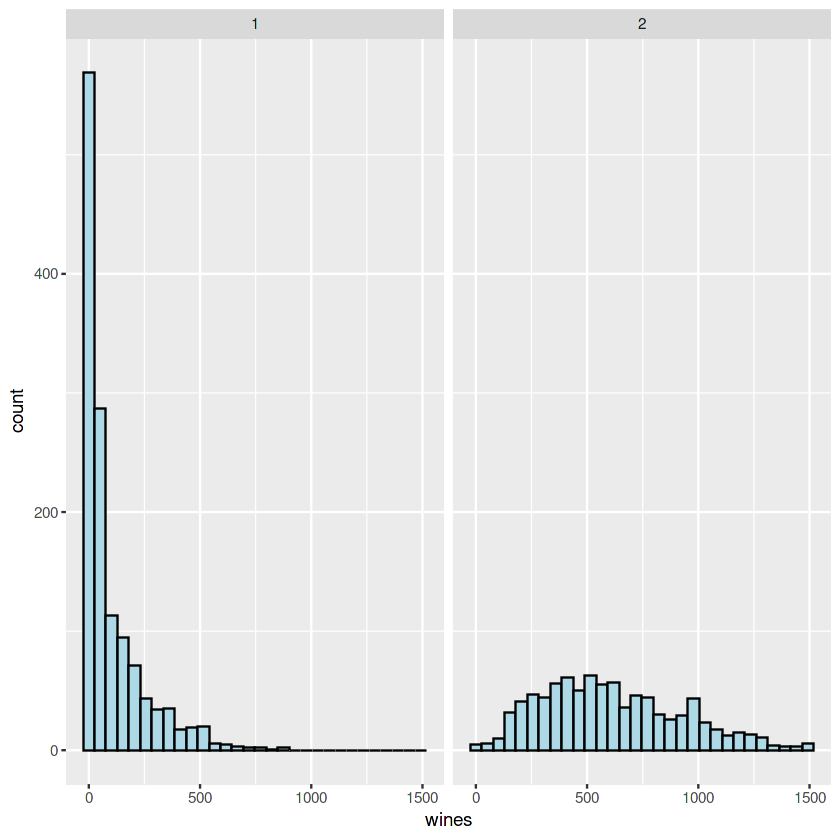

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



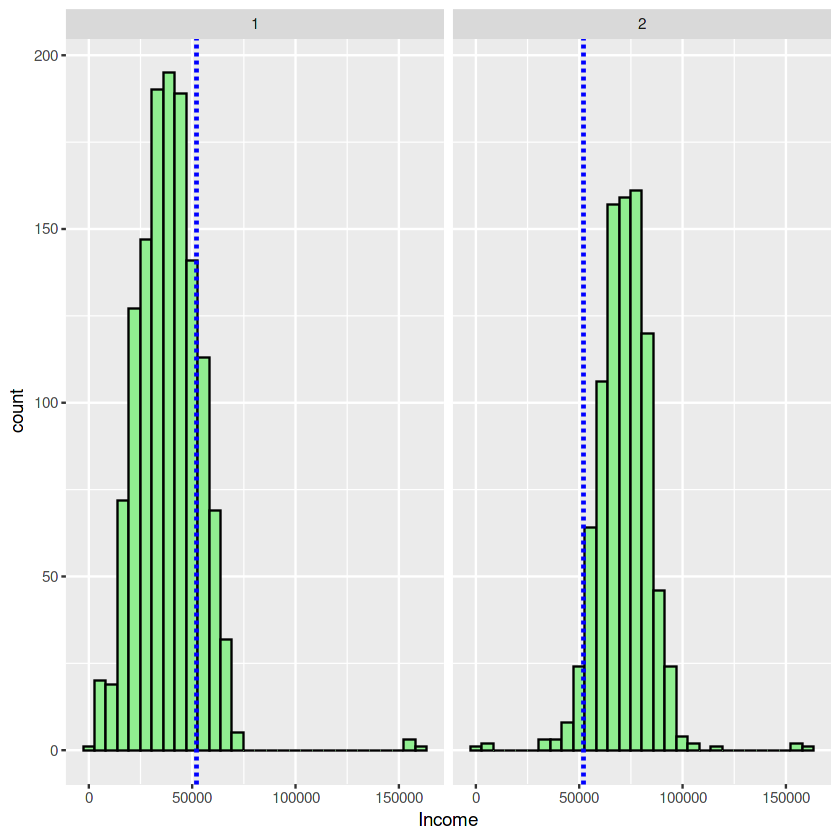

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



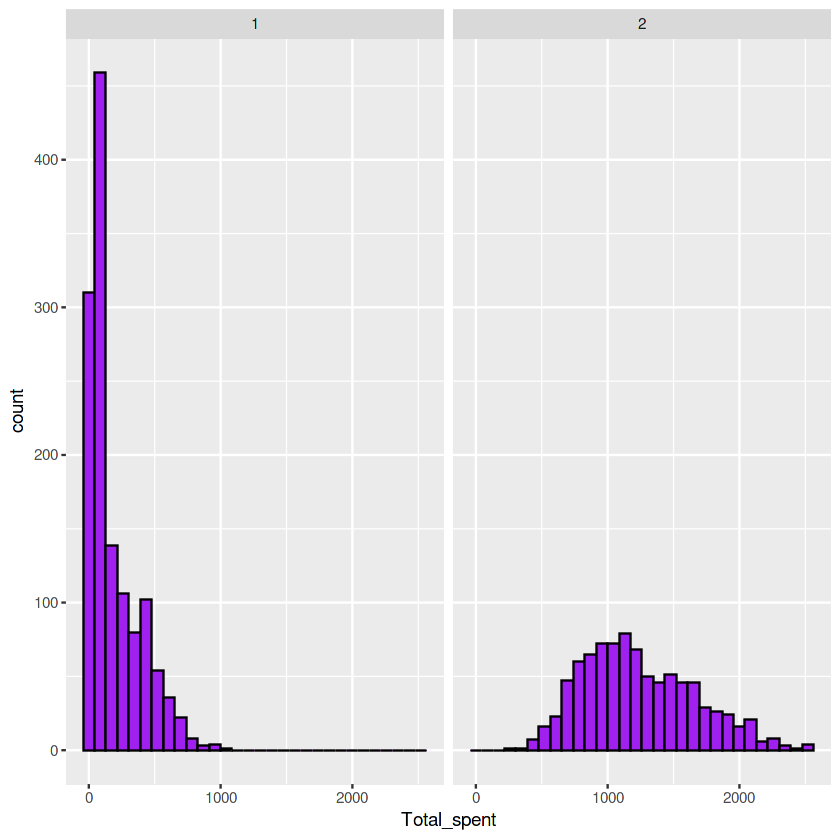

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



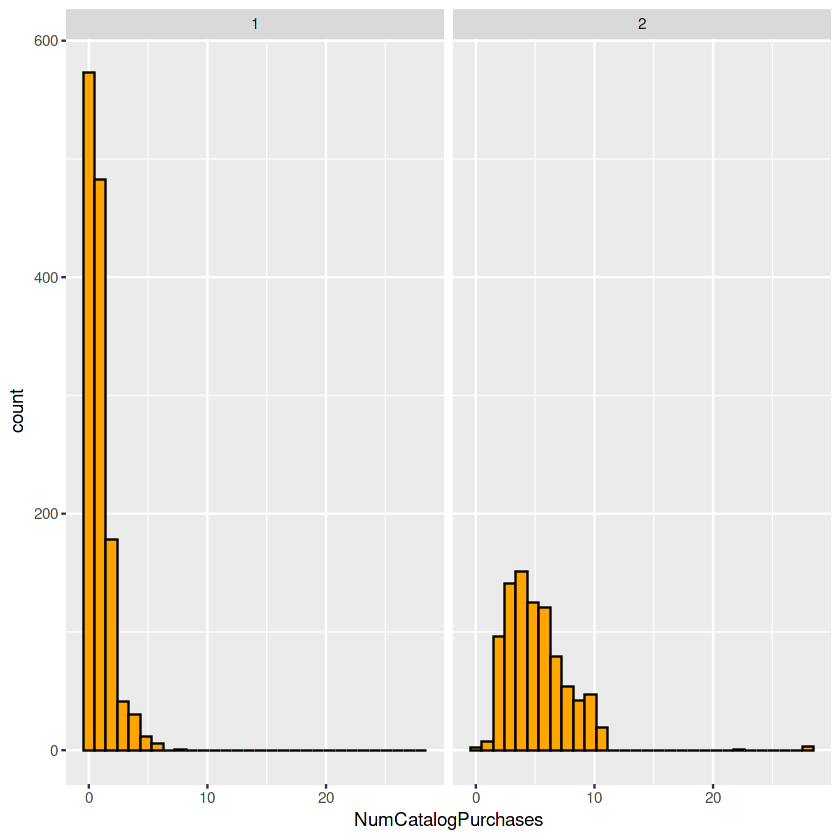

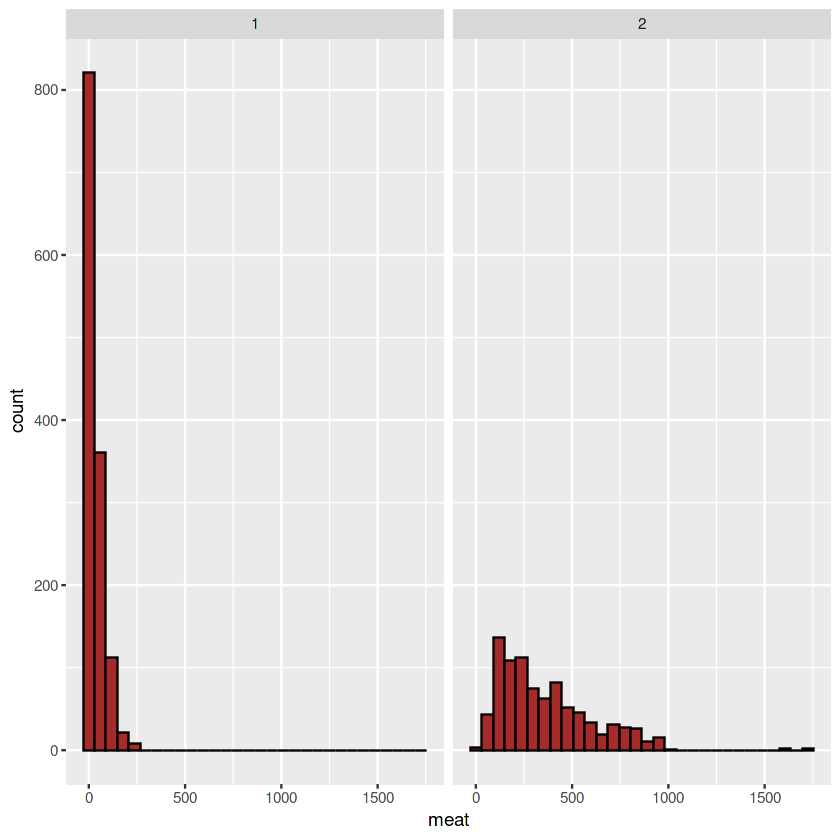

In [26]:
#visualizing wines
customers %>% ggplot(aes(wines)) + geom_histogram(color = "black", fill = "lightblue") + facet_wrap(vars(cluster)) 
#visualizing Income variable
customers %>% ggplot(aes(Income)) + geom_histogram(color = "black", fill = "lightgreen") + facet_wrap(vars(cluster)) +  geom_vline(aes(xintercept=mean(Income)),color="blue", linetype="dashed", size = 1)
#visualizing Total_spent
customers %>% ggplot(aes(Total_spent)) + geom_histogram(color = "black", fill = "purple") + facet_wrap(vars(cluster))
#visualizing NumCatalogPurchases
customers %>% ggplot(aes(NumCatalogPurchases)) + geom_histogram(color = "black", fill = "orange") + facet_wrap(vars(cluster)) 
#visualizing meat variable
customers %>% ggplot(aes(meat)) + geom_histogram(color = "black", fill = "brown") + facet_wrap(vars(cluster))

**We going to compare the 2 clusters from the visuals above**

**Cluster 1**                           
* This cluster of customers have low purchasing power when it comes to wines; with majority  of them not purchasing this item at all.
* Have relatively lower income compared tp the other cluster, with majority of the customers' income lying below  the mean Income.
*  Have lower total spending 
* Majority of the customers have zero catalog purchases.
* Majority of the customers have zero meat purchases.

**Cluster 2**
* This group has a high purchasing power when it comes to wine compared to group 1.
* Relatively higher income with majority of the customers' income lying above the mean income.
* Have relatively higher total spending with majority  spending past 1000.
* Have fairly number of catalog purchases.
* Purchases more meat than group 1.

# Conclusion

I performed unsupervised learning in R with basic clustering(k-means) and dimesionality reduction specifically PCA from a machine learning perspective so as to get some insights from the data. This marks the end of this kernel.

**If you enjoyed this kernel, please upvote**

**Also let me know what you think in the comment section**

**THANK YOU**